<a href="https://colab.research.google.com/github/rohitraju1966/My-Data-Projects/blob/main/Water_data_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#My first data science **project** 

# ***Water Quality prediction***



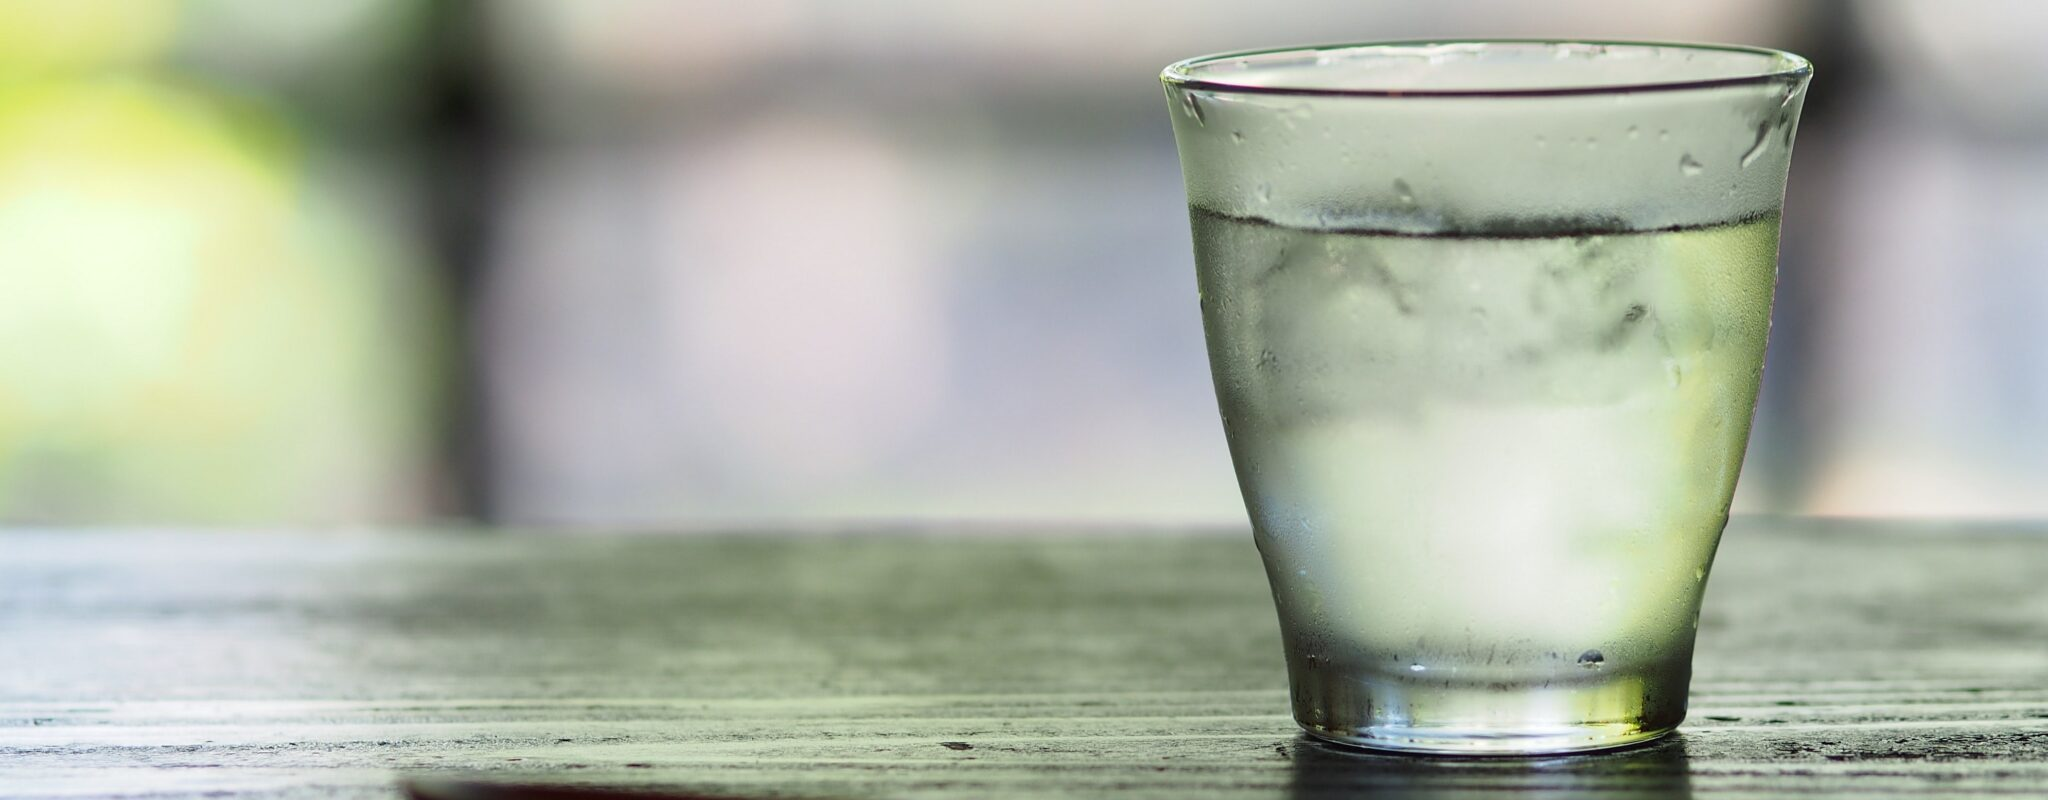

# **Glossary**:


1. **pH value**:
PH is an important parameter in evaluating the acid–base balance of water. It is also the indicator of acidic or alkaline condition of water status. WHO has recommended maximum permissible limit of pH from 6.5 to 8.5. The current investigation ranges were 6.52–6.83 which are in the range of WHO standards.

2. **Hardness**:
Hardness is mainly caused by calcium and magnesium salts. These salts are dissolved from geologic deposits through which water travels. The length of time water is in contact with hardness producing material helps determine how much hardness there is in raw water. Hardness was originally defined as the capacity of water to precipitate soap caused by Calcium and Magnesium.

3. **Solids (Total dissolved solids - TDS)**:
Water has the ability to dissolve a wide range of inorganic and some organic minerals or salts such as potassium, calcium, sodium, bicarbonates, chlorides, magnesium, sulfates etc. These minerals produced un-wanted taste and diluted color in appearance of water. This is the important parameter for the use of water. The water with high TDS value indicates that water is highly mineralized. Desirable limit for TDS is 500 mg/l and maximum limit is 1000 mg/l which prescribed for drinking purpose.

4. **Chloramines**:
Chlorine and chloramine are the major disinfectants used in public water systems. Chloramines are most commonly formed when ammonia is added to chlorine to treat drinking water. Chlorine levels up to 4 milligrams per liter (mg/L or 4 parts per million (ppm)) are considered safe in drinking water.

5. **Sulfate**:
Sulfates are naturally occurring substances that are found in minerals, soil, and rocks. They are present in ambient air, groundwater, plants, and food. The principal commercial use of sulfate is in the chemical industry. Sulfate concentration in seawater is about 2,700 milligrams per liter (mg/L). It ranges from 3 to 30 mg/L in most freshwater supplies, although much higher concentrations (1000 mg/L) are found in some geographic locations.

6. **Conductivity**:
Pure water is not a good conductor of electric current rather’s a good insulator. Increase in ions concentration enhances the electrical conductivity of water. Generally, the amount of dissolved solids in water determines the electrical conductivity. Electrical conductivity (EC) actually measures the ionic process of a solution that enables it to transmit current. According to WHO standards, EC value should not exceeded 400 μS/cm.

7. **Organic_carbon**:
Total Organic Carbon (TOC) in source waters comes from decaying natural organic matter (NOM) as well as synthetic sources. TOC is a measure of the total amount of carbon in organic compounds in pure water. According to US EPA < 2 mg/L as TOC in treated / drinking water, and < 4 mg/Lit in source water which is use for treatment.

8. **Trihalomethanes**:
THMs are chemicals which may be found in water treated with chlorine. The concentration of THMs in drinking water varies according to the level of organic material in the water, the amount of chlorine required to treat the water, and the temperature of the water that is being treated. THM levels up to 80 ppm is considered safe in drinking water.

9. **Turbidity**:
The turbidity of water depends on the quantity of solid matter present in the suspended state. It is a measure of light emitting properties of water and the test is used to indicate the quality of waste discharge with respect to colloidal matter. The mean turbidity value obtained for Wondo Genet Campus (0.98 NTU) is lower than the WHO recommended value of 5.00 NTU.

10. **Potability**:
Indicates if water is safe for human consumption where 1 means Potable and 0 means Not potable.



# *Importing all the necessary libraries*

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
sns.set()

# *Reading data*

In [ ]:
df=pd.read_csv('../input/water-potability/water_potability.csv')

In [ ]:
df

In [ ]:
df.describe()

In [ ]:
df.info()

In [ ]:
df.isnull().sum(axis=0)

# *Fixing all the null values*

In [ ]:
df2=df

In [ ]:
df2=df2.dropna()

In [ ]:
df2=df2.reset_index()

In [ ]:
df2.drop(['index'],axis=1)

In [ ]:
df2.isnull().sum(axis=0)

# *Ploting data to observe and remove outliers*

In [ ]:
df2

In [ ]:
df2=df2.drop(['index'],axis=1)

In [ ]:
sns.distplot(df2['ph'],bins=30)

In [ ]:
sns.histplot(df2['Potability'])

In [ ]:
sns.boxplot(df2['ph'])

In [ ]:
data=df2.drop(df2[df2['ph']>12].index)

In [ ]:
sns.boxplot(data['ph'])

In [ ]:
sns.distplot(data['ph'],bins=30)

In [ ]:
sns.distplot(df2['Hardness'])

In [ ]:
sns.boxplot(df2['Hardness'])

In [ ]:
data=data.drop(data[data['Hardness']>300].index)

In [ ]:
sns.boxplot(data['Hardness'])

In [ ]:
sns.distplot(df2['Solids'])

In [ ]:
sns.boxplot(data['Solids'])

In [ ]:
sns.distplot(data['Solids'])

In [ ]:
data=data.drop(data[data['Solids']>45000].index)

In [ ]:
sns.boxplot(data['Solids'])

In [ ]:
data[data['Solids']>45000].count()

In [ ]:
data.reset_index(inplace=True)

In [ ]:
data

In [ ]:
sns.distplot(data['Chloramines'])

In [ ]:
sns.boxplot(data['Chloramines'])

In [ ]:
data=data.drop(data[data['Chloramines']>12].index)

In [ ]:
sns.histplot(data['Sulfate'])

In [ ]:
sns.boxplot(data['Sulfate'])

In [ ]:
sns.distplot(data['Conductivity'])

In [ ]:
sns.boxplot(data['Conductivity'])

In [ ]:
data=data.drop(data[data['Conductivity']>650].index)

In [ ]:
sns.distplot(data['Conductivity'])

In [ ]:
sns.distplot(data['Organic_carbon'])


In [ ]:
sns.distplot(data['Trihalomethanes'])


In [ ]:
sns.distplot(data['Turbidity'])

The removed outliers may not make a big difference to our accuracy but its worth giving a try to increase the accuracy

In [ ]:
data.reset_index(inplace=True,drop=True)
data

In [ ]:
data=data.drop(['index'],axis=1)

In [ ]:
data.describe()

In [ ]:
data.iloc[:,:9]

In [ ]:
X=data.iloc[:,:9]
Y=data['Potability']

In [ ]:
scale=StandardScaler()

In [ ]:
scale.fit(X)

In [ ]:
d=scale.transform(X)

In [ ]:
d

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(d,Y, test_size=0.20,random_state=300)

In [ ]:
x_test

# ***Logistic regression***

In [ ]:
k=LogisticRegression()

In [ ]:
k.fit(x_train,y_train)

In [ ]:
prediction=k.predict(x_test)

In [ ]:
print(metrics.confusion_matrix(y_test,prediction))
print(metrics.classification_report(y_test,prediction))

# ***k-nearest neighbors***

In [ ]:
error_rate = []
for i in range(1,40):
 
 knn = KNeighborsClassifier(n_neighbors=i)
 knn.fit(x_train,y_train)
 pred_i = knn.predict(x_test)
 error_rate.append(np.mean(pred_i != y_test))
plt.figure(figsize=(10,6))
plt.plot(range(1,40),error_rate,color='blue', linestyle='dashed', marker='o',markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')

In [ ]:
a=KNeighborsClassifier(n_neighbors=17)

In [ ]:
a.fit(x_train,y_train)

In [ ]:
predictions=a.predict(x_test)

In [ ]:
print(metrics.confusion_matrix(y_test,predictions))
print(metrics.classification_report(y_test,predictions))

# ***Random Forest Classifier***

In [ ]:
R=RandomForestClassifier(n_estimators=1000)
R.fit(x_train,y_train)
pred=R.predict(x_test)
print(metrics.confusion_matrix(y_test,pred))
print(metrics.classification_report(y_test,pred))

***From the above models we can say that randomforest is the best model to use because it gives us an accuracy close to 71%***